In [225]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
len=20
k=10

folder_path = f'/home/uj-user/Yo/HiT5/HCLT/gen_dataset_curation/result_ppl_instruction_len{len}/'
df = pd.read_json(f'{folder_path}result_len{len}_k{k}.json', lines=True, orient='records')
df

,ppl,len,len_group,cluster,group,instruction,output
0,4.11,3,0,0,vicuna,I'm,"I'm sorry, it seems like your message got cut ..."
1,4.34,2,0,0,vicuna,��,제가 도와드릴 일이 더 있나요?
2,7.64,10,0,0,vicuna,존재하지 않습니다.,혼란을 드려 죄송합니다. 이전에 제공한 링크 중 일부가 웹사이트의 변경 사항이나 해...
3,8.32,8,0,0,vicuna,완료되었습니다.,감사합니다! 도와드리게 되어 기뻤습니다. 다른 질문이 있으시면 언제든지 문의해 주세요!
4,8.40,14,0,0,vicuna,그렇지 않은 것 같습니다.,이전 답변의 실수에 대해 사과드립니다. 문자 χ(A) = tr(A)
...,...,...,...,...,...,...,...
375501,105.00,194,19,9,vicuna,홀푸드에서 섹션/통로별로 쇼핑 목록을 정렬해 주세요.---양파마늘(로트)베이컨갈은 ...,홀푸드의 섹션/통로별로 쇼핑 목록을 정리해 보았습니다:농산물:* 양파* 마늘(로트)...
375502,109.80,169,19,9,vicuna,왼쪽 열의 각 평가 결과에 대해 확인란을 선택하여 해당 결과가 DKA 및 HHS D...,HHS:* 혼란과 무기력함: 예* 빠르고 얕은 호흡: 예* 갈증과 배고픔: 예* 과...
375503,173.11,258,19,9,vicuna,이 모든 재료가 제 레시피에 포함되어 있는지 확인해 주세요:\r \r 노란 양파 1...,"예, 이 모든 재료는 레시피에 포함되어 있습니다."
375504,233.70,379,19,9,vicuna,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,죄송합니다. 질문이나 요청이 무엇인지 잘 모르겠습니다. Python 또는 프로그래밍...


In [226]:
method="ppl_h"
n=0.05
folder_path = f'/home/uj-user/Yo/HiT5/HCLT/gen_dataset_curation/final_results_len{len}/'
filtered_df = pd.read_json(f'{folder_path}result_len{len}_k{k}_m{method}_n{n}.json', lines=True, orient='records')

/home/uj-user/Yo/HiT5/HCLT/hclt-venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


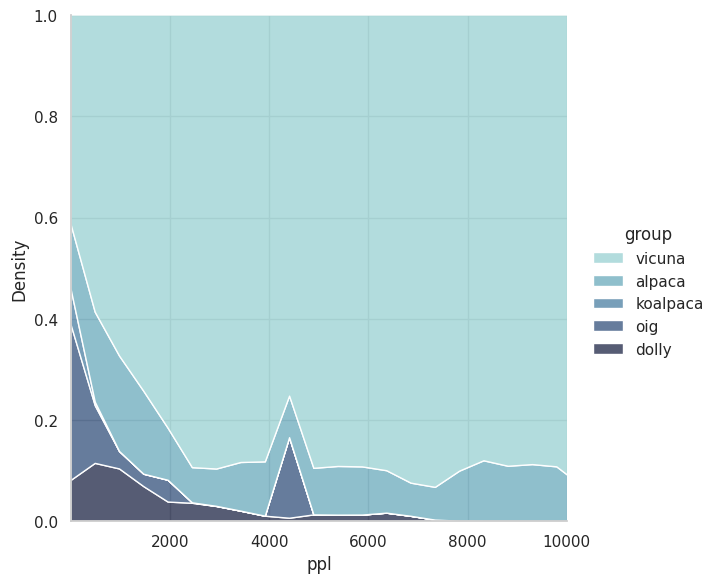

In [227]:
sns.set_theme(style="whitegrid")
s = sns.displot(
    data=filtered_df,
    x="ppl", hue="group",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)
s.set(xlim=(1, 10000))

In [228]:
df['group'] = df['group'].replace({'vicuna':'kullm-vicuna', 'alpaca':'kullm-alpaca', 'dolly':'kullm-dolly'})
filtered_df['group'] = filtered_df['group'].replace({'vicuna':'kullm-vicuna', 'alpaca':'kullm-alpaca', 'dolly':'kullm-dolly'})
vis_length_df =  df.rename(columns = {'len_group': 'length group'})
vis_length_df.sort_values(by=['group'], inplace=True)

In [247]:
vis_length_df

,ppl,len,length group,cluster,group,instruction,output
296929,24.73,56,15,8,koalpaca,일본의 아베 신사참배는 어떤 문제가 있나요? 일본 이외 국가들의 반발이 어떤 이유에...,"아베 신사참배는 일본에서 신사(神社)라고 불리는 종교적 건물에서 일어나는 일로, 일..."
343130,15.94,141,18,3,koalpaca,도장을 깨끗하게 보관하는 방법은 무엇인가요? 사무실에 가서 법인 도장을 확인하던 중...,도장에 낀 인주 찌꺼기는 글자가 선명하게 나타나지 않는 문제를 일으킵니다. 도장의 ...
240614,15.51,43,13,0,koalpaca,한국 지폐에 그려진 인물들은 누가 그린 것인가요? 그들의 이름을 알고 싶습니다.,한국 지폐에 그려진 인물들의 초상화 원본을 그린 화가들은 다음과 같습니다. 1만원권...
240613,15.50,46,13,0,koalpaca,2005년 추석 연휴에 방영된 TV 프로그램과 영화는 무엇이 있을까요? 추천해주세요.,"MBC, KBS, SBS 등 방송사에서 2005년 추석 연휴에 방영된 TV 프로그램..."
240608,15.44,45,13,0,koalpaca,대표이사와 사장의 차이는 무엇인가요? 법적 또는 일반적인 차이가 있는지 궁금합니다.,"법인 회사에서 대표이사와 사장은 종종 같은 역할로 사용되기도 하지만, 법적으로나 일..."
...,...,...,...,...,...,...,...
218521,60.66,37,11,8,oig,파편이 많이 나고 의사가 수술을 원합니다. 그게 정말 필요한가요?,그것은 파편의 위치와 크기에 따라 다릅니다. 파편이 어디에 있는지 말해 줄 수 있습니까?
218522,60.66,37,11,8,oig,파편이 많이 나고 의사가 수술을 원합니다. 그게 정말 필요한가요?,그것은 파편의 위치와 크기에 따라 다릅니다. 상황에 대해 더 말씀해 주시겠습니까?
218523,60.66,37,11,8,oig,파편이 많이 나고 의사가 수술을 원합니다. 그게 정말 필요한가요?,그것은 파편의 위치와 크기에 따라 다릅니다. 어떤 종류의 파편입니까?
218496,57.73,38,11,8,oig,전남편이 결혼 빚 중 자신의 몫을 갚게 하려면 어떻게 해야 합니까?,"당신은 그에게 지불을 요구할 수도 있고, 그와 협상을 시도할 수도 있습니다. 그가 ..."


In [262]:
sort_df = vis_length_df.astype({'len':'int', 'length group':'int', 'ppl':'float', 'cluster':'int',})
sort_df = sort_df[sort_df['len']<100]

,ppl,len,length group,cluster,group,instruction,output
296929,24.73,56,15,8,koalpaca,일본의 아베 신사참배는 어떤 문제가 있나요? 일본 이외 국가들의 반발이 어떤 이유에...,"아베 신사참배는 일본에서 신사(神社)라고 불리는 종교적 건물에서 일어나는 일로, 일..."
240614,15.51,43,13,0,koalpaca,한국 지폐에 그려진 인물들은 누가 그린 것인가요? 그들의 이름을 알고 싶습니다.,한국 지폐에 그려진 인물들의 초상화 원본을 그린 화가들은 다음과 같습니다. 1만원권...
240613,15.50,46,13,0,koalpaca,2005년 추석 연휴에 방영된 TV 프로그램과 영화는 무엇이 있을까요? 추천해주세요.,"MBC, KBS, SBS 등 방송사에서 2005년 추석 연휴에 방영된 TV 프로그램..."
240608,15.44,45,13,0,koalpaca,대표이사와 사장의 차이는 무엇인가요? 법적 또는 일반적인 차이가 있는지 궁금합니다.,"법인 회사에서 대표이사와 사장은 종종 같은 역할로 사용되기도 하지만, 법적으로나 일..."
240607,15.44,43,13,0,koalpaca,"좀비는 실제로 존재하나요? 인터넷 검색결과, 좀비는 살아있는 시체라는데 맞나요?","좀비는 실제로 존재하지 않습니다. 좀비는 일부 문화권에서 전해오는 전설이나 소설, ..."
...,...,...,...,...,...,...,...
218521,60.66,37,11,8,oig,파편이 많이 나고 의사가 수술을 원합니다. 그게 정말 필요한가요?,그것은 파편의 위치와 크기에 따라 다릅니다. 파편이 어디에 있는지 말해 줄 수 있습니까?
218522,60.66,37,11,8,oig,파편이 많이 나고 의사가 수술을 원합니다. 그게 정말 필요한가요?,그것은 파편의 위치와 크기에 따라 다릅니다. 상황에 대해 더 말씀해 주시겠습니까?
218523,60.66,37,11,8,oig,파편이 많이 나고 의사가 수술을 원합니다. 그게 정말 필요한가요?,그것은 파편의 위치와 크기에 따라 다릅니다. 어떤 종류의 파편입니까?
218496,57.73,38,11,8,oig,전남편이 결혼 빚 중 자신의 몫을 갚게 하려면 어떻게 해야 합니까?,"당신은 그에게 지불을 요구할 수도 있고, 그와 협상을 시도할 수도 있습니다. 그가 ..."


In [265]:
sort_df

,ppl,len,length group,cluster,group,instruction,output
296929,24.73,56,15,8,koalpaca,일본의 아베 신사참배는 어떤 문제가 있나요? 일본 이외 국가들의 반발이 어떤 이유에...,"아베 신사참배는 일본에서 신사(神社)라고 불리는 종교적 건물에서 일어나는 일로, 일..."
343130,15.94,141,18,3,koalpaca,도장을 깨끗하게 보관하는 방법은 무엇인가요? 사무실에 가서 법인 도장을 확인하던 중...,도장에 낀 인주 찌꺼기는 글자가 선명하게 나타나지 않는 문제를 일으킵니다. 도장의 ...
240614,15.51,43,13,0,koalpaca,한국 지폐에 그려진 인물들은 누가 그린 것인가요? 그들의 이름을 알고 싶습니다.,한국 지폐에 그려진 인물들의 초상화 원본을 그린 화가들은 다음과 같습니다. 1만원권...
240613,15.50,46,13,0,koalpaca,2005년 추석 연휴에 방영된 TV 프로그램과 영화는 무엇이 있을까요? 추천해주세요.,"MBC, KBS, SBS 등 방송사에서 2005년 추석 연휴에 방영된 TV 프로그램..."
240608,15.44,45,13,0,koalpaca,대표이사와 사장의 차이는 무엇인가요? 법적 또는 일반적인 차이가 있는지 궁금합니다.,"법인 회사에서 대표이사와 사장은 종종 같은 역할로 사용되기도 하지만, 법적으로나 일..."
...,...,...,...,...,...,...,...
218521,60.66,37,11,8,oig,파편이 많이 나고 의사가 수술을 원합니다. 그게 정말 필요한가요?,그것은 파편의 위치와 크기에 따라 다릅니다. 파편이 어디에 있는지 말해 줄 수 있습니까?
218522,60.66,37,11,8,oig,파편이 많이 나고 의사가 수술을 원합니다. 그게 정말 필요한가요?,그것은 파편의 위치와 크기에 따라 다릅니다. 상황에 대해 더 말씀해 주시겠습니까?
218523,60.66,37,11,8,oig,파편이 많이 나고 의사가 수술을 원합니다. 그게 정말 필요한가요?,그것은 파편의 위치와 크기에 따라 다릅니다. 어떤 종류의 파편입니까?
218496,57.73,38,11,8,oig,전남편이 결혼 빚 중 자신의 몫을 갚게 하려면 어떻게 해야 합니까?,"당신은 그에게 지불을 요구할 수도 있고, 그와 협상을 시도할 수도 있습니다. 그가 ..."


/home/uj-user/Yo/HiT5/HCLT/hclt-venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


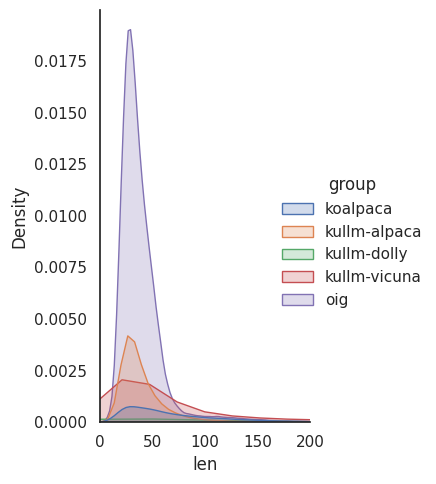

In [288]:
sns.set_theme(style="white", palette=None)

s =sns.displot(data=sort_df, x='len', hue='group', kind='kde', fill=True)
s.set(xlim=(0, 200))
s.fig.set_size_inches(4,5)

/home/uj-user/Yo/HiT5/HCLT/hclt-venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/uj-user/Yo/HiT5/HCLT/hclt-venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/uj-user/Yo/HiT5/HCLT/hclt-venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/uj-user/Yo/HiT5/HCLT/hclt-venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/uj-user/Yo/HiT5/HCLT/hcl

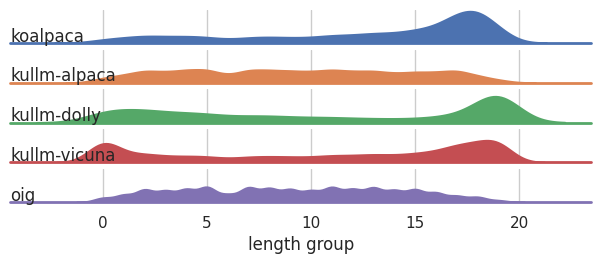

In [229]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
# rs = np.random.RandomState(1979)
# x = rs.randn(500)
# g = np.tile(list("ABCDEFGHIJ"), 50)
# df = pd.DataFrame(dict(x=x, g=g))
# m = df.g.map(ord)
# df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(vis_length_df, row="group", hue="group", aspect=15, height=.5)#, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "length group",
      #bw_adjust=.5, #clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
# g.map(sns.kdeplot, "len_group", fill=True)#, clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, #fontweight="bold",# color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "length group")

# Set the subplots to overlap
# g.figure.subplots_adjust(hspace=-.05)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

/home/uj-user/Yo/HiT5/HCLT/hclt-venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


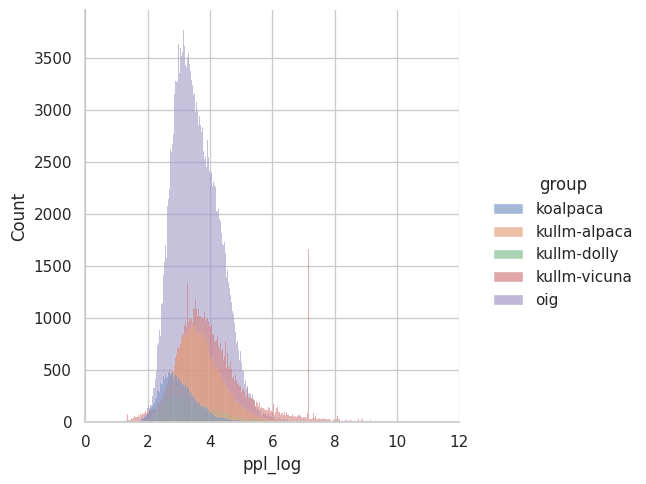

In [174]:
df['ppl_log'] = np.log(df['ppl'])
df = df.sort_values(by=("group"))
s = sns.displot(data=df, x='ppl_log', hue='group')#, kind='kde', fill=True, bw_adjust=.25,)
s.set(xlim=(0, 12))

/home/uj-user/Yo/HiT5/HCLT/hclt-venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


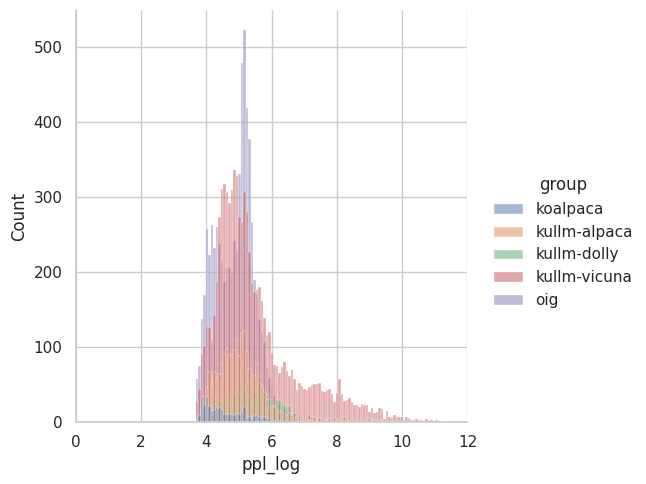

In [175]:
filtered_df['ppl_log'] = np.log(filtered_df['ppl'])
filtered_df = filtered_df.sort_values(by=("group"))

s = sns.displot(data=filtered_df, x='ppl_log', hue='group')#, kind='kde', fill=True, bw_adjust=.25,)
s.set(xlim=(0, 12))

/home/uj-user/Yo/HiT5/HCLT/hclt-venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


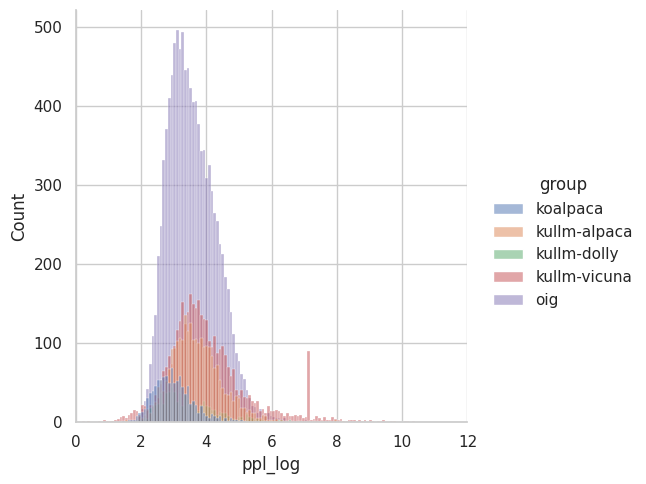

In [176]:
method="ppl"
folder_path = f'/home/uj-user/Yo/HiT5/HCLT/gen_dataset_curation/final_results_len{len}/'
filtered_df2 = pd.read_json(f'{folder_path}result_len{len}_k{k}_m{method}_n{n}.json', lines=True, orient='records')
filtered_df2['ppl_log'] = np.log(filtered_df2['ppl'])
filtered_df2['group'] = filtered_df2['group'].replace({'vicuna':'kullm-vicuna', 'alpaca':'kullm-alpaca', 'dolly':'kullm-dolly'})
filtered_df2['group'] = filtered_df2['group'].replace({'vicuna':'kullm-vicuna', 'alpaca':'kullm-alpaca', 'dolly':'kullm-dolly'})
filtered_df2 = filtered_df2.sort_values(by=("group"))
s = sns.displot(data=filtered_df2, x='ppl_log', hue='group')#, kind='kde', fill=True, bw_adjust=.25,)
s.set(xlim=(0, 12))

/home/uj-user/Yo/HiT5/HCLT/hclt-venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


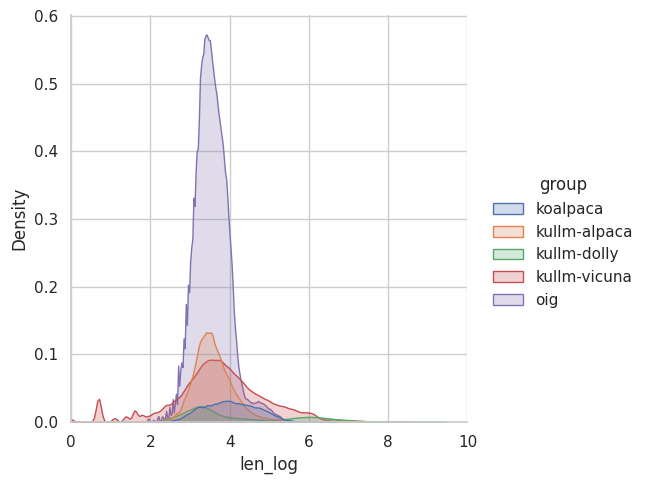

In [231]:
df = df.sort_values(by=("group"))
df['len_log'] = np.log(df['len'])
s = sns.displot(data=df, x='len_log', hue='group', kind='kde', fill=True, bw_adjust=.5,)
s.set(xlim=(0, 10))

/home/uj-user/Yo/HiT5/HCLT/hclt-venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


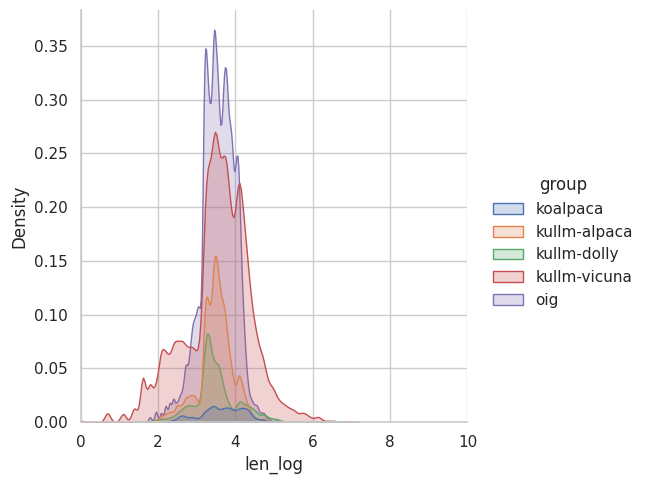

In [218]:
filtered_df = filtered_df.sort_values(by=("group"))
filtered_df['len_log'] = np.log(filtered_df['len'])
s = sns.displot(data=filtered_df, x='len_log', hue='group', kind='kde', fill=True, bw_adjust=.5,)
s.set(xlim=(0, 10))

/home/uj-user/Yo/HiT5/HCLT/hclt-venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


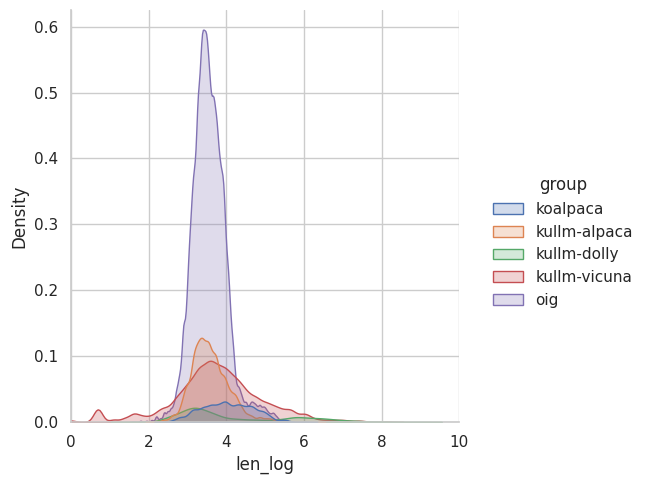

In [219]:
filtered_df2 = filtered_df2.sort_values(by=("group"))
filtered_df2['len_log'] = np.log(filtered_df2['len'])
s = sns.displot(data=filtered_df2, x='len_log', hue='group', kind='kde', fill=True, bw_adjust=.5,)
s.set(xlim=(0, 10))

In [177]:
filtered_df2

,ppl,len,len_group,cluster,group,instruction,output,ppl_log
0,5.21,17,0,0,koalpaca,우울증에 좋은 음식은 무엇인가요?,"기분조절 음식으로는 화날 때 사과, 우울할 때 초코렛, 슬플 때 부드러운 음식(푸딩...",1.650580
15680,12.38,123,4,1,koalpaca,"봄에는 벚꽃이, 여름에는 초록색 잎, 가을에는 붉은색 잎이 생기는 것 같은데, 봄과...","잎이 피거나 떨어지는 것, 그리고 꽃이 핀다는 것은 온도보다 밤의 길이가 더 큰 영...",2.516082
15681,12.42,141,4,1,koalpaca,남자들이 치마를 못입는 진짜 이유는 뭘까요? 티비의 오락 프로그램이나 개그 프로그램...,"예전부터 스코틀랜드나 인도, 아랍 지역 등에서는 남성들도 치마를 입고 다녔습니다. ...",2.519308
15682,12.48,116,4,1,koalpaca,왜 바다에서 오징어를 잡을 때 배에 불을 켜고 잡을까? 바다에서 오징어를 잡는 배에...,"동물에는 '주성'이라는 성질이 있습니다. 주성은 자극의 종류에 따라 주화성, 주기성...",2.524127
15683,12.52,118,4,1,koalpaca,왜 야구 구장에는 전체적으로 잔디가 깔리지 않고 일부분만 흙을 사용할까요? 야구...,잔디를 모두 깔게 되면 유지비용이 증가하게 되어 경제적인 측면에서 부담이 됩니다. ...,2.527327
...,...,...,...,...,...,...,...,...
11186,15.71,41,3,0,oig,우리 아이들이 패혈성 인두염에 걸리지 않도록 하려면 어떻게 해야 합니까?,자녀가 패혈성 인두염에 걸리지 않도록 예방하는 한 가지 방법은 최신 예방 접종을 받...,2.754297
11187,15.79,40,3,0,oig,수업 시간에 선생님의 지시를 이해하는 데 문제가 있습니다. 도와주세요?,확실히 시도할 수 있습니다. 수업의 주제는 무엇입니까?,2.759377
11188,15.82,45,3,0,oig,많은 유명인들이 독감 예방 접종을 받았다고 들었습니다. 예방접종도 해야 하나요?,백신 접종에 대한 결정을 내리기 전에 위험 요소를 고려하고 의사와 상의하는 것이 중...,2.761275
11212,17.03,46,3,0,oig,내 친구는 일에 집중하는 데 어려움을 겪고 있습니다. 그를 위한 조언이 있습니까?,확실히 도울 수 있습니다. 그가 일에 집중하는 데 어려움을 겪는 이유는 무엇입니까?,2.834976


In [178]:
df

,ppl,len,len_group,cluster,group,instruction,output,ppl_log
0,5.21,17,0,0,koalpaca,우울증에 좋은 음식은 무엇인가요?,"기분조절 음식으로는 화날 때 사과, 우울할 때 초코렛, 슬플 때 부드러운 음식(푸딩...",1.650580
55253,206.67,23,0,7,koalpaca,외국어도 지방 특색 억양인 사투리가 있나요?,"영어권 국가에서도 지방 특색 억양인 사투리가 있습니다. 캐나다, 미국, 영국, 호주...",5.331123
99671,19.61,29,1,4,koalpaca,올빼미와 부엉이는 어떻게 다른가요? 똑같이 생겼는데요.,올빼미와 부엉이는 모두 올빼미목 올빼미과의 조류입니다. 하지만 가장 큰 차이점은 귀...,2.976040
99670,19.61,29,1,4,koalpaca,"병과 증후군은 무엇이며, 그들 간의 차이는 무엇인가요?",병은 어떤 생물체의 일부분이나 전신에서 이상이 생겨 정상적인 기능이 이루어지지 않아...,2.976040
99669,19.61,28,1,4,koalpaca,타작과 탈곡의 차이는 무엇인가요? 비슷한 의미인가요?,타작과 탈곡은 의미상 비슷하지만 약간의 차이가 있습니다. 타작은 곡식의 낟알을 떨어...,2.976040
...,...,...,...,...,...,...,...,...
224052,17.16,54,3,0,oig,내 개는 몇 가지 행동 문제가 있습니다. 그들을 관리하는 방법에 대한 조언을 해줄 ...,1. 반려견의 개별 행동을 이해하고 행동 문제의 원인을 식별하는 것부터 시작하십시오...,2.842581
224053,17.18,46,3,0,oig,새보다 바위를 더 쉽게 잡을 수 있다면 새보다 바위를 더 쉽게 잡을 수 있을까요?,바위는 단단한 물체이고 새는 날아다니는 동물이기 때문에 새보다 바위를 더 쉽게 잡을...,2.843746
224054,17.18,46,3,0,oig,새보다 바위를 더 쉽게 잡을 수 있다면 새보다 바위를 더 쉽게 잡을 수 있을까요?,"예, 새보다 바위를 더 쉽게 잡을 수 있습니다.",2.843746
224043,17.16,47,3,0,oig,자궁 적출술을 받으면 유방 보형물을 얻을 수 있다고 들었습니다. 이것이 사실입니까?,"아니요, 사실이 아닙니다. 자궁 적출술은 자궁을 외과적으로 제거하는 것입니다. 유방...",2.842581


In [199]:
df['method']='original'
filtered_df['method']='ppl_h'
filtered_df2['method']='ppl'
concat_df = pd.concat([filtered_df,  df], ignore_index=True)

/home/uj-user/Yo/HiT5/HCLT/hclt-venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


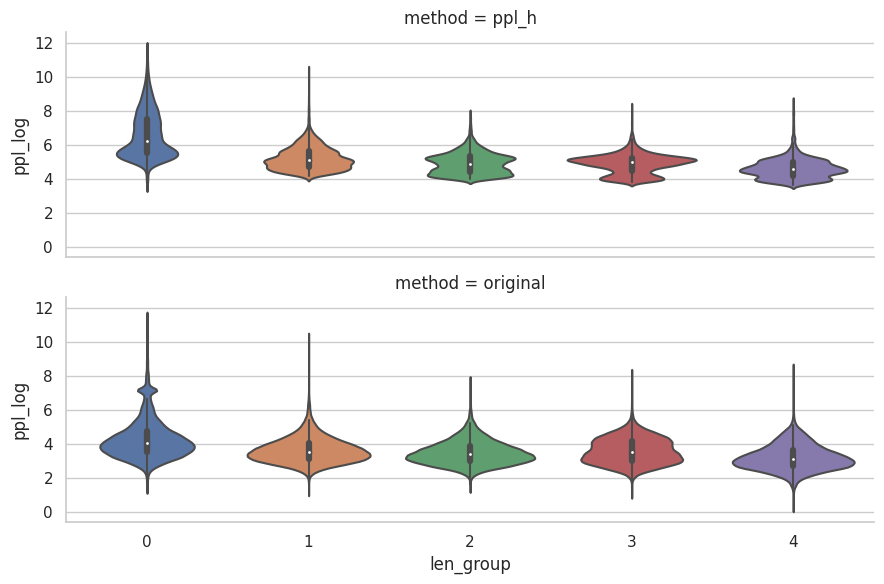

In [244]:
s = sns.catplot(x="len_group", y="ppl_log", row='method', data=concat_df, kind="violin", height=3, aspect=3)

/home/uj-user/Yo/HiT5/HCLT/hclt-venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


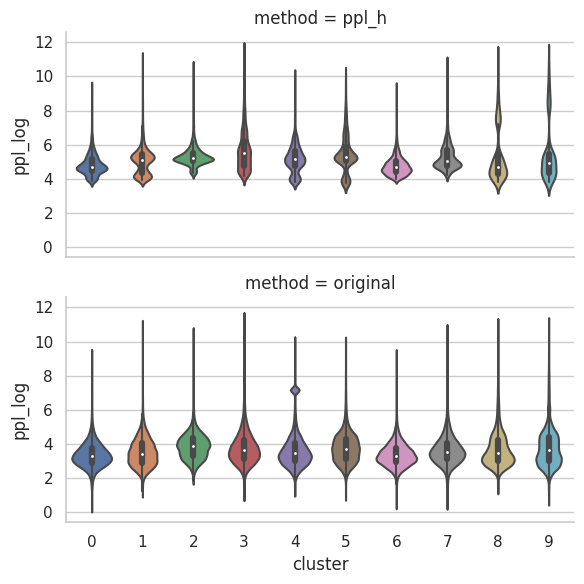

In [233]:
s = sns.catplot(x="cluster", y="ppl_log", row='method', data=concat_df, kind="violin", height=3, aspect=2)

/home/uj-user/Yo/HiT5/HCLT/hclt-venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


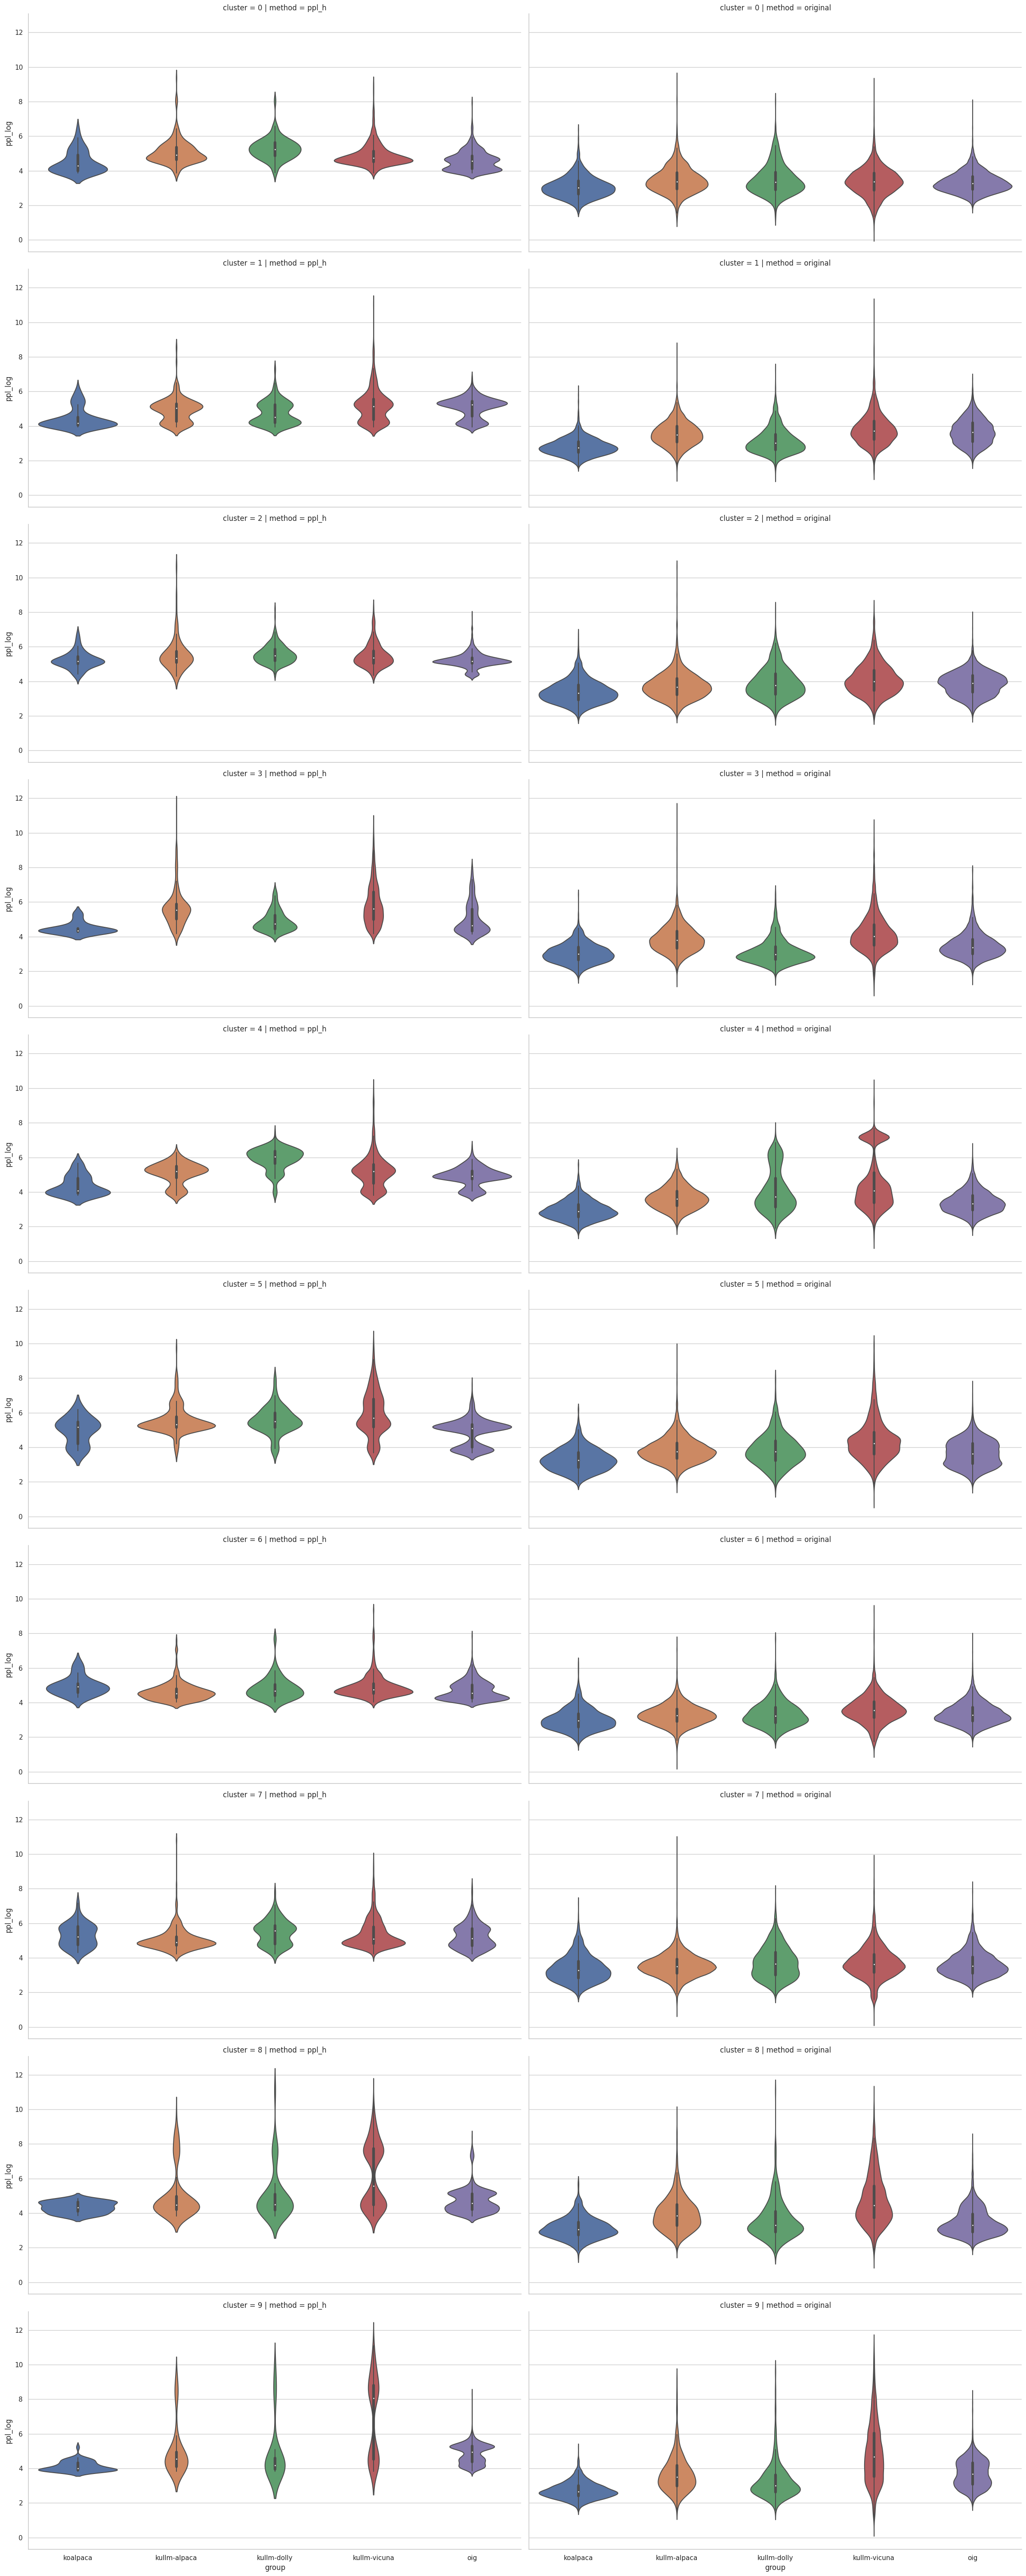

In [201]:
s = sns.catplot(x="group", y="ppl_log", row='cluster', col='method',  data=concat_df, kind="violin", height=3, aspect=2)

<Axes: xlabel='group', ylabel='len'>

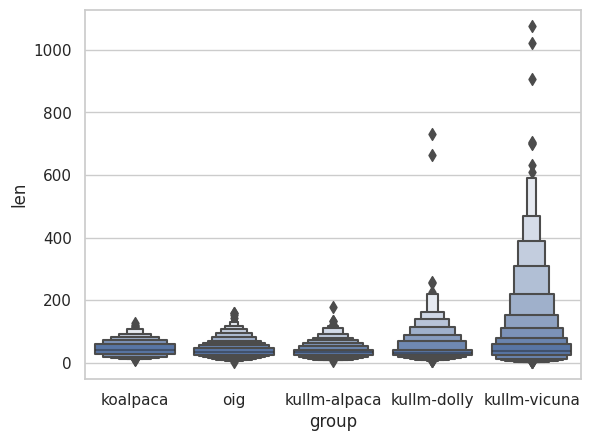

In [194]:
import seaborn as sns
sns.set_theme(style="whitegrid")

diamonds = sns.load_dataset("diamonds")
clarity_ranking = ["koalpaca", "oig", "kullm-alpaca",  'kullm-dolly' , "kullm-vicuna", ]

sns.boxenplot(x="group", y="len",
              color="b", order=clarity_ranking,
              scale="linear", data=filtered_df)

In [182]:
df[['ppl','len_group']]

,ppl,len_group
0,5.21,0
55253,206.67,0
99671,19.61,1
99670,19.61,1
99669,19.61,1
...,...,...
224052,17.16,3
224053,17.18,3
224054,17.18,3
224043,17.16,3


/home/uj-user/Yo/HiT5/HCLT/hclt-venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


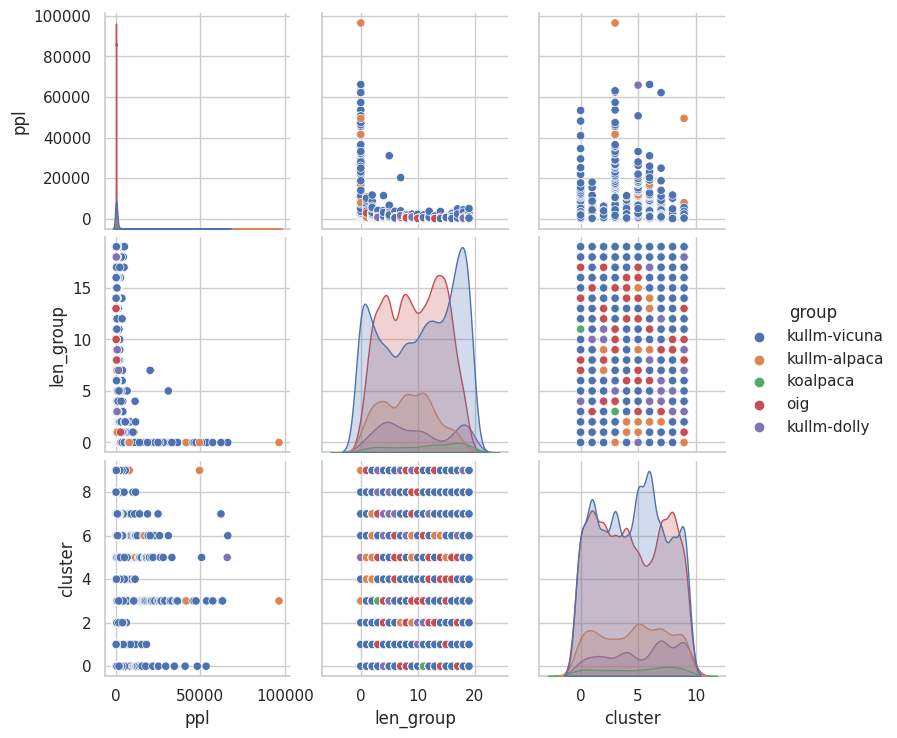

In [232]:
sns.pairplot(filtered_df[['ppl','len_group', 'cluster', 'group']], hue="group")

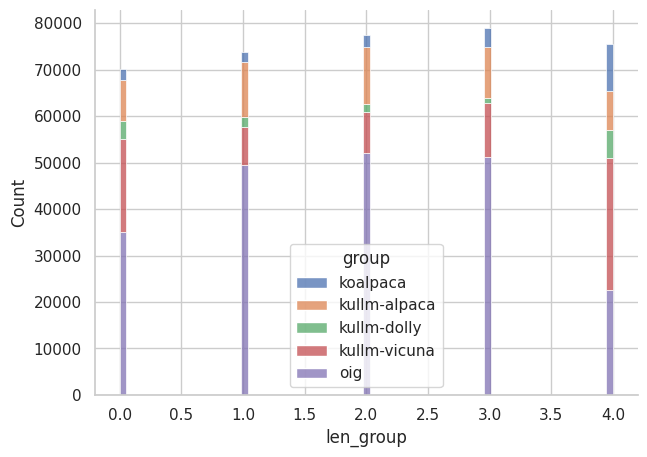

In [184]:

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    df,
    x="len_group", hue="group",
    multiple="stack",
    # palette="light:m_r",
    # edgecolor=".3",
    # linewidth=.10,
    # # log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
